# **Logistic Regression From Scratch**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data= pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv')
data.head(10)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
5,6,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
6,7,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
7,8,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
8,9,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0
9,10,132,0.00,5.80,30.96,Present,69,30.11,0.00,53,1


### Calculating Percentages of Each Class


In [ ]:
count=0
for i in data["chd"]:
  if i==0:
    count+=1
percentage0=count/len(data["chd"])*100
percentage1=(len(data["chd"])-count)/len(data["chd"])*100
print(f"percentage of class 0: {round(percentage0,2)}")
print(f"percentage of class 1: {round(percentage1,2)}")


percentage of class 0: 65.37
percentage of class 1: 34.63


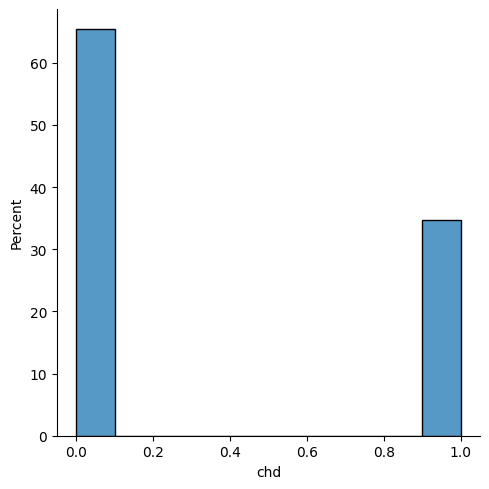

In [ ]:
sns.displot(x='chd', data=data, stat='percent')
plt.show()

### Checking for Null and N/A Values (Missing Values)

In [ ]:
print(f"checking for N/A values\n{data.isna().any()}")
print(f"\nchecking for Null values\n{data.isnull().any()}")

checking for N/A values
row.names    False
sbp          False
tobacco      False
ldl          False
adiposity    False
famhist      False
typea        False
obesity      False
alcohol      False
age          False
chd          False
dtype: bool

checking for Null values
row.names    False
sbp          False
tobacco      False
ldl          False
adiposity    False
famhist      False
typea        False
obesity      False
alcohol      False
age          False
chd          False
dtype: bool


Having no null or N/A values present in any of the entries given ensures to missing values.

Missing Values can also be spotted in the data description by looking at the count variable in the data description. If the count is equal to the number of data entries for each feature then this means none of the features are missing a value.

In [ ]:
data.describe()

,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,231.935065,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,133.938585,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,1.000000,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,116.250000,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,231.500000,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,347.750000,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,463.000000,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


###Categorical Variables Spotted
The data provided only contains one categorical variable which is "famhist"

In [ ]:
print(data[["famhist"]].head(10))

   famhist
0  Present
1   Absent
2  Present
3  Present
4  Present
5  Present
6   Absent
7  Present
8  Present
9  Present


## Data Correlation

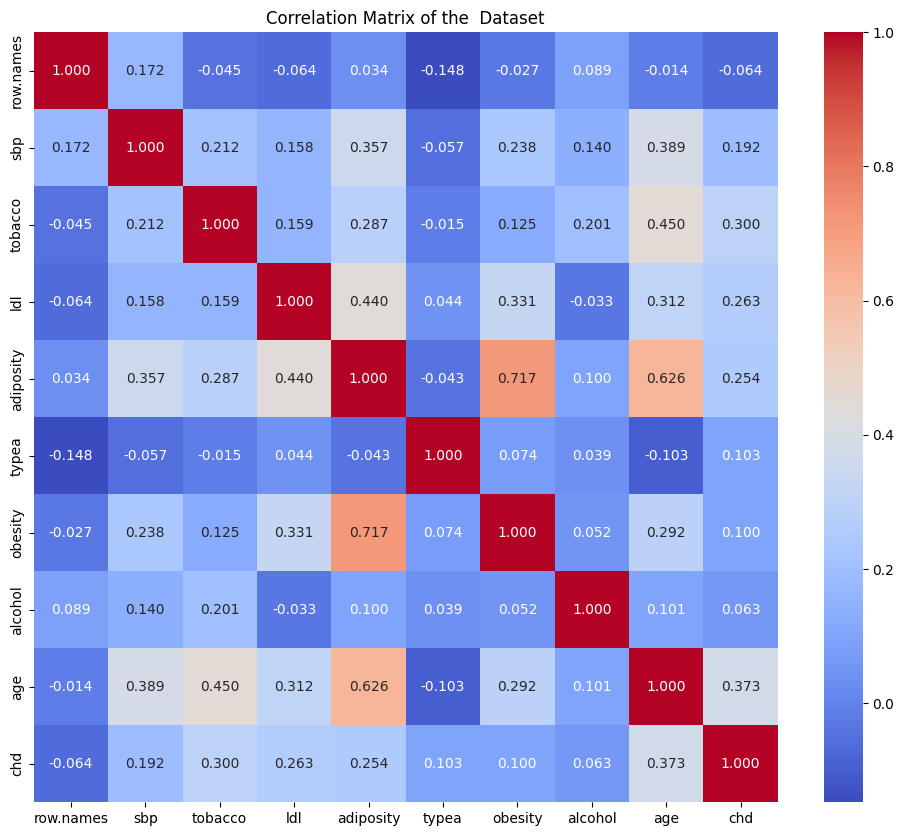

In [ ]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Matrix of the  Dataset')
plt.show()

Based on the correlation matrix the features correlating themselves would have an expected value of 1. High correlations between features were observed among two distinct correlations: age and adiposity having a high correlation of 0.626 followed by obesity and adiposity with a correlation score of 0.717. This puts the correlation of obesity and adiposity at the maximum correlation score of 0.717.

### Input Data
Constructing the input data by disincluding the output column and the row.names column as it holds no value to the studied data

In [ ]:
inputData=data.iloc[:,1:-2]
inputData.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol
0,160,12.00,5.73,23.11,Present,49,25.30,97.20
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06
2,118,0.08,3.48,32.28,Present,52,29.14,3.81
3,170,7.50,6.41,38.03,Present,51,31.99,24.26
4,134,13.60,3.50,27.78,Present,60,25.99,57.34


### Output data
Constructed by extracting the target value (chd)

In [ ]:
outputData=data.iloc[:,-1]
outputData.head()

,chd
0,1
1,1
2,0
3,1
4,1


## Standardization
Standardization was applied to Input data while excluding the categorical feature "famhist"

In [ ]:
standardizedData=pd.DataFrame()
for i in range(len(inputData.columns)):
  #Skipping the column "famhist" as it is categorical
  if i==4:
    continue
  standardizedData[inputData.columns[i]]= (inputData[inputData.columns[i]]-inputData[inputData.columns[i]].mean())/inputData[inputData.columns[i]].std()
standardizedData.head(10)


,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol
0,1.057417,1.821099,0.477894,-0.295183,-0.418017,-0.176594,3.274189
1,0.276789,-0.789382,-0.159507,0.411694,0.193134,0.670646,-0.612081
2,-0.991731,-0.774141,-0.608585,0.883374,-0.112441,0.734723,-0.540597
3,1.545310,0.841352,0.806252,1.622382,-0.214300,1.411091,0.294742
4,-0.211103,2.169453,-0.598928,0.305020,0.702427,-0.012842,1.645991
5,-0.308682,0.558314,0.835225,1.388470,0.906144,1.121558,-0.118638
6,0.179211,0.090213,-0.656873,-1.183278,0.600569,-1.242171,-0.589206
7,-1.186888,0.096745,-0.072589,-1.388915,0.906144,-0.696330,-0.421730
8,-1.186888,-0.791559,-0.439577,-0.772004,-0.418017,-0.281016,-0.594517
9,-0.308682,-0.791559,0.511696,0.713724,1.619154,0.964925,-0.696228


### Applying One-Hot-Encoding to "famhist" column

In [ ]:
encoded=OneHotEncoder(handle_unknown='ignore')

encodedArray=encoded.fit_transform(inputData[["famhist"]]).toarray()
print(list(encodedArray[0]))
PresentList=[]
AbsentList=[]

for i in encodedArray:
  PresentList.append(int(i[1]))
  AbsentList.append(int(i[0]))
standardizedData.insert(4,"famhist_Absent",AbsentList)
standardizedData.insert(5,"famhist_Present",PresentList)
standardizedData.head(10)

[0.0, 1.0]


,sbp,tobacco,ldl,adiposity,famhist_Absent,famhist_Present,typea,obesity,alcohol
0,1.057417,1.821099,0.477894,-0.295183,0,1,-0.418017,-0.176594,3.274189
1,0.276789,-0.789382,-0.159507,0.411694,1,0,0.193134,0.670646,-0.612081
2,-0.991731,-0.774141,-0.608585,0.883374,0,1,-0.112441,0.734723,-0.540597
3,1.545310,0.841352,0.806252,1.622382,0,1,-0.214300,1.411091,0.294742
4,-0.211103,2.169453,-0.598928,0.305020,0,1,0.702427,-0.012842,1.645991
5,-0.308682,0.558314,0.835225,1.388470,0,1,0.906144,1.121558,-0.118638
6,0.179211,0.090213,-0.656873,-1.183278,1,0,0.600569,-1.242171,-0.589206
7,-1.186888,0.096745,-0.072589,-1.388915,0,1,0.906144,-0.696330,-0.421730
8,-1.186888,-0.791559,-0.439577,-0.772004,0,1,-0.418017,-0.281016,-0.594517
9,-0.308682,-0.791559,0.511696,0.713724,0,1,1.619154,0.964925,-0.696228


## Adding a Bias to Input Standardized features

In [ ]:
##add bias to input features
standardizedData.insert(0,"bias",1)
standardizedData.head(3)

,bias,sbp,tobacco,ldl,adiposity,famhist_Absent,famhist_Present,typea,obesity,alcohol
0,1,1.057417,1.821099,0.477894,-0.295183,0,1,-0.418017,-0.176594,3.274189
1,1,0.276789,-0.789382,-0.159507,0.411694,1,0,0.193134,0.670646,-0.612081
2,1,-0.991731,-0.774141,-0.608585,0.883374,0,1,-0.112441,0.734723,-0.540597


##Initialization
Initializing values for the weights from 0 to 1 range

In [ ]:
initial_theta_list=np.random.uniform(0,1,len(standardizedData.columns))
initial_theta_list=initial_theta_list.tolist()
print(initial_theta_list)

[0.4428248571655228, 0.8556939077011901, 0.48153465394868133, 0.6313846176455794, 0.5428111710738965, 0.9490744275997273, 0.9286941484443709, 0.7702067905346144, 0.17344147009006916, 0.5314623716536936]


## Z function

In [ ]:
def z(x,theta):
  return np.dot(x,theta)

In [ ]:
z(np.array(standardizedData.iloc[0,:]),initial_theta_list)

4.682292745850891

### Visualizing Z value

In [ ]:
zList=[]
df=standardizedData.copy()
for i in range(len(standardizedData)):
  zList.append(z(standardizedData.iloc[i,:], initial_theta_list))
df['Z']=zList
df.head()

,bias,sbp,tobacco,ldl,adiposity,famhist_Absent,famhist_Present,typea,obesity,alcohol,Z
0,1,1.057417,1.821099,0.477894,-0.295183,0,1,-0.418017,-0.176594,3.274189,4.682293
1,1,0.276789,-0.789382,-0.159507,0.411694,1,0,0.193134,0.670646,-0.612081,1.311167
2,1,-0.991731,-0.774141,-0.608585,0.883374,0,1,-0.112441,0.734723,-0.540597,-0.001100
3,1,1.545310,0.841352,0.806252,1.622382,0,1,-0.214300,1.411091,0.294742,4.725005
4,1,-0.211103,2.169453,-0.598928,0.305020,0,1,0.702427,-0.012842,1.645991,3.436530


## Hypothesis
model function

In [ ]:
def h(x, theta):
  return 1/(1+np.exp(-z(x,theta)))

In [ ]:
h(np.array(standardizedData.iloc[0,:]),initial_theta_list)

0.9908271561854753

### Visualizing Hypothesis (H)

In [ ]:
hList=[]
for i in range(len(standardizedData)):
  hList.append(h(standardizedData.iloc[i,:], initial_theta_list))
df['Hypothesis']=hList
df.head()

,bias,sbp,tobacco,ldl,adiposity,famhist_Absent,famhist_Present,typea,obesity,alcohol,Z,Hypothesis
0,1,1.057417,1.821099,0.477894,-0.295183,0,1,-0.418017,-0.176594,3.274189,4.682293,0.990827
1,1,0.276789,-0.789382,-0.159507,0.411694,1,0,0.193134,0.670646,-0.612081,1.311167,0.787708
2,1,-0.991731,-0.774141,-0.608585,0.883374,0,1,-0.112441,0.734723,-0.540597,-0.001100,0.499725
3,1,1.545310,0.841352,0.806252,1.622382,0,1,-0.214300,1.411091,0.294742,4.725005,0.991207
4,1,-0.211103,2.169453,-0.598928,0.305020,0,1,0.702427,-0.012842,1.645991,3.436530,0.968827


## Cost Function

In [ ]:
def costFunction(x, y, theta):
  m = len(y)
  h_theta = h(x, theta)
  error = - (1/m) * np.sum(y * np.log(h_theta) + (1 - y) * np.log(1 - h_theta))
  return error

In [ ]:
costFunction(standardizedData,outputData,initial_theta_list)

1.0832823068830018

## Logistic Gradient Descent

In [ ]:
def gradientDescent(x, y, alpha, theta):
  m=len(x)
  gradient=0
  sig=h(x,theta)
  gradient=np.dot(x.T,(sig-y))
  theta=theta-(alpha/m)*gradient
  return theta

## Batch Gradient Descent

### Testing with Learning rate = 0.001

#### **Applying 500 Iterations**

In [ ]:
theta=initial_theta_list
lossFunction=[]
for i in range(500):
  theta=gradientDescent(standardizedData,outputData,0.001,theta)
  lossFunction.append(costFunction(standardizedData,outputData,theta))



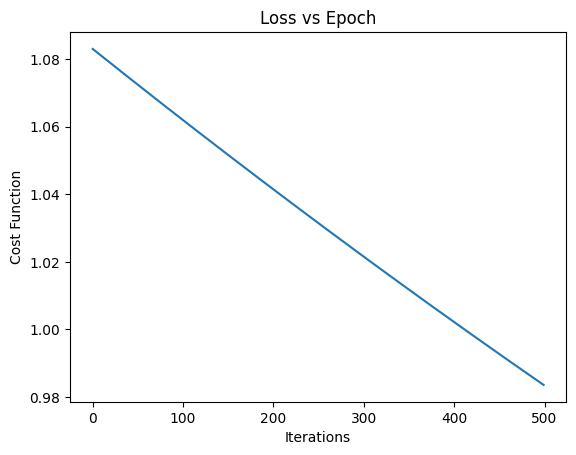

In [ ]:
plt.plot(range(500), lossFunction)
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Loss vs Epoch")
plt.show()

#### **Applying 1000 Iterations**

In [ ]:
theta=initial_theta_list
lossFunction=[]
for i in range(1000):
  theta=gradientDescent(standardizedData,outputData,0.001,theta)
  lossFunction.append(costFunction(standardizedData,outputData,theta))

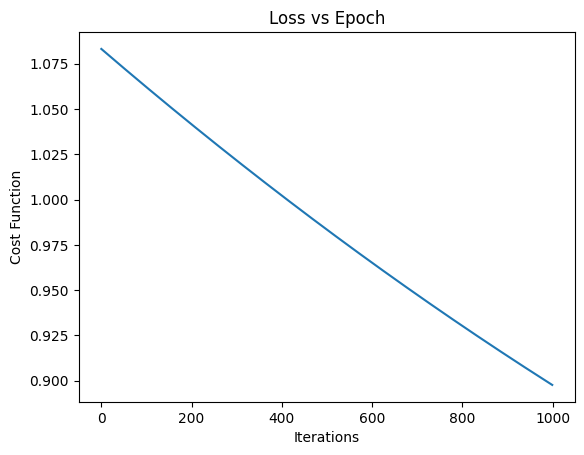

In [ ]:
plt.plot(range(1000), lossFunction)
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Loss vs Epoch")
plt.show()

#### **Applying 10000 Iterations**

In [ ]:
theta=initial_theta_list
lossFunction=[]
for i in range(10000):
  theta=gradientDescent(standardizedData,outputData,0.001,theta)
  lossFunction.append(costFunction(standardizedData,outputData,theta))

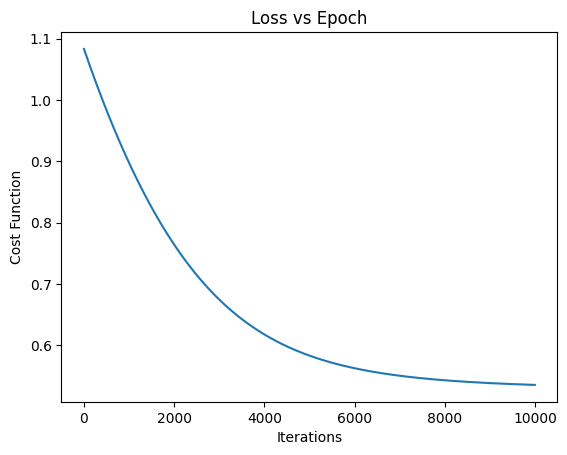

In [ ]:
plt.plot(range(10000), lossFunction)
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Loss vs Epoch")
plt.show()

Based on the learning curves above it is evident that an epoch value around 10000 is a good value to stop at as the curve seem to regularize and cost would not decrease significantly past this point.

### Testing with Learning rate = 0.0001



#### **Applying 500 Iterations**

In [ ]:
theta=initial_theta_list
lossFunction=[]
for i in range(500):
  theta=gradientDescent(standardizedData,outputData,0.0001,theta)
  lossFunction.append(costFunction(standardizedData,outputData,theta))



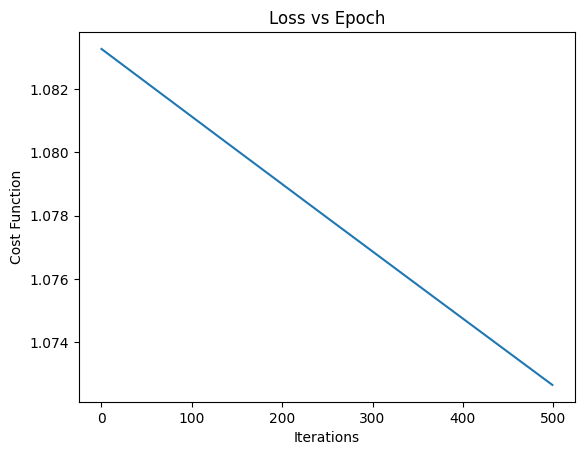

In [ ]:
plt.plot(range(500), lossFunction)
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Loss vs Epoch")
plt.show()

#### **Applying 1000 Iterations**

In [ ]:
theta=initial_theta_list
lossFunction=[]
for i in range(1000):
  theta=gradientDescent(standardizedData,outputData,0.0001,theta)
  lossFunction.append(costFunction(standardizedData,outputData,theta))

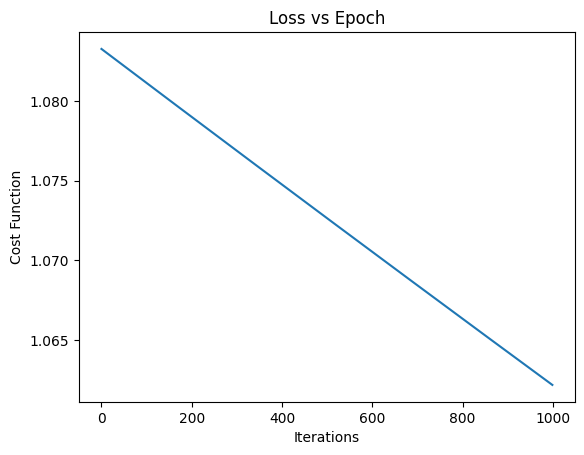

In [ ]:
plt.plot(range(1000), lossFunction)
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Loss vs Epoch")
plt.show()

#### **Applying 10000 Iterations**

In [ ]:
theta=initial_theta_list
lossFunction=[]
for i in range(10000):
  theta=gradientDescent(standardizedData,outputData,0.0001,theta)
  lossFunction.append(costFunction(standardizedData,outputData,theta))

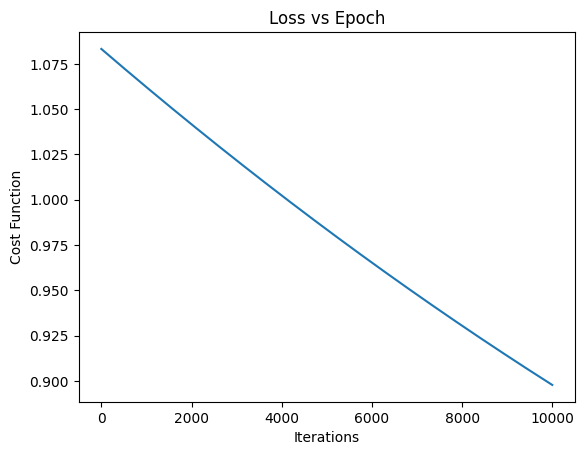

In [ ]:
plt.plot(range(10000), lossFunction)
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Loss vs Epoch")
plt.show()

Based on the learning curves for this learning rate, it is clear that it requires much more than 10000 epochs to settle the learning curve and for the cost to stop decreasing significantly. As of now 10000 are insufficient and more epochs are required for this learning rate on batch gradient descent.

## Mini Batch Gradient Descent

In [ ]:
miniBatch=[]
for i in range(0,len(standardizedData),50):
  miniBatch.append(i)
miniBatch.append(len(standardizedData))
print(miniBatch)

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 462]


### Testing with Learning rate = 0.001






#### **Applying 500 Iterations**

In [ ]:
theta=initial_theta_list[:]
lossFunction=[]
for i in range(500):
  for j in range(len(miniBatch)-1):
    inputSet=standardizedData.iloc[miniBatch[j]:miniBatch[j+1],:].copy()
    outputSet=outputData.iloc[miniBatch[j]:miniBatch[j+1]].copy()
    inputSet=inputSet.reset_index(drop=True)
    outputSet=outputSet.reset_index(drop=True)
    theta=gradientDescent(inputSet, outputSet, 0.001, theta)
  lossFunction.append(costFunction(standardizedData,outputData,theta))
print(initial_theta_list)
print(theta)

[0.4428248571655228, 0.8556939077011901, 0.48153465394868133, 0.6313846176455794, 0.5428111710738965, 0.9490744275997273, 0.9286941484443709, 0.7702067905346144, 0.17344147009006916, 0.5314623716536936]
[-0.60883887  0.43527376  0.480635    0.44476166  0.29404329  0.20137771
  0.62472714  0.43075101 -0.2017536   0.21805109]


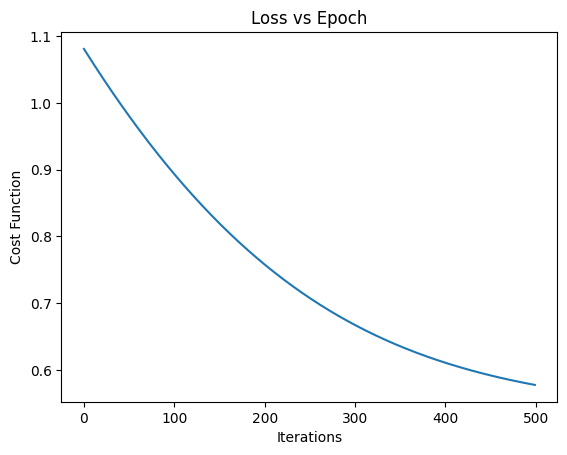

In [ ]:
plt.plot(range(500), lossFunction)
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Loss vs Epoch")
plt.show()

#### **Applying 1000 Iterations**

In [ ]:
theta=initial_theta_list[:]
lossFunction=[]
for i in range(1000):
  for j in range(len(miniBatch)-1):
    inputSet=standardizedData.iloc[miniBatch[j]:miniBatch[j+1],:].copy()
    outputSet=outputData.iloc[miniBatch[j]:miniBatch[j+1]].copy()
    inputSet=inputSet.reset_index(drop=True)
    outputSet=outputSet.reset_index(drop=True)
    theta=gradientDescent(inputSet, outputSet, 0.001, theta)
  lossFunction.append(costFunction(standardizedData,outputData,theta))
print(initial_theta_list)
print(theta)

[0.4428248571655228, 0.8556939077011901, 0.48153465394868133, 0.6313846176455794, 0.5428111710738965, 0.9490744275997273, 0.9286941484443709, 0.7702067905346144, 0.17344147009006916, 0.5314623716536936]
[-0.86205057  0.26138291  0.46552662  0.37335178  0.33368229 -0.03123658
  0.60412973  0.27881101 -0.28470966  0.06684601]


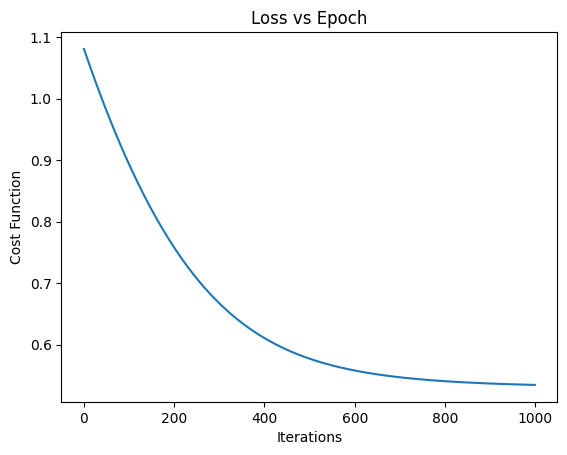

In [ ]:
plt.plot(range(1000), lossFunction)
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Loss vs Epoch")
plt.show()

#### **Applying 10000 Iterations**

In [ ]:
theta=initial_theta_list[:]
lossFunction=[]
for i in range(10000):
  for j in range(len(miniBatch)-1):
    inputSet=standardizedData.iloc[miniBatch[j]:miniBatch[j+1],:].copy()
    outputSet=outputData.iloc[miniBatch[j]:miniBatch[j+1]].copy()
    inputSet=inputSet.reset_index(drop=True)
    outputSet=outputSet.reset_index(drop=True)
    theta=gradientDescent(inputSet, outputSet, 0.001, theta)
  lossFunction.append(costFunction(standardizedData,outputData,theta))
print(initial_theta_list)
print(theta)

[0.4428248571655228, 0.8556939077011901, 0.48153465394868133, 0.6313846176455794, 0.5428111710738965, 0.9490744275997273, 0.9286941484443709, 0.7702067905346144, 0.17344147009006916, 0.5314623716536936]
[-0.93831183  0.1587757   0.4638388   0.28780491  0.65432479 -0.21614008
  0.71277197  0.23180224 -0.50875945 -0.01833077]


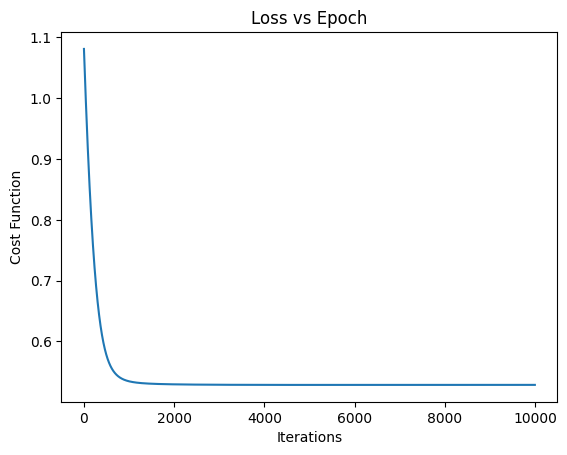

In [ ]:
plt.plot(range(10000), lossFunction)
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Loss vs Epoch")
plt.show()

Based on the learning curves above it is evident that an epoch value around 1000 to 1500 is a good range of values to stop at as the curve seem to regularize and cost is not decreaing significantly past this point but rather a flat staright line around the same cost value (little to no change).

### Testing with Learning rate = 0.0001


#### **Applying 500 Iterations**

In [ ]:
theta=initial_theta_list[:]
lossFunction=[]
for i in range(500):
  for j in range(len(miniBatch)-1):
    inputSet=standardizedData.iloc[miniBatch[j]:miniBatch[j+1],:].copy()
    outputSet=outputData.iloc[miniBatch[j]:miniBatch[j+1]].copy()
    inputSet=inputSet.reset_index(drop=True)
    outputSet=outputSet.reset_index(drop=True)
    theta=gradientDescent(inputSet, outputSet, 0.0001, theta)
  lossFunction.append(costFunction(standardizedData,outputData,theta))
print(initial_theta_list)
print(theta)

[0.4428248571655228, 0.8556939077011901, 0.48153465394868133, 0.6313846176455794, 0.5428111710738965, 0.9490744275997273, 0.9286941484443709, 0.7702067905346144, 0.17344147009006916, 0.5314623716536936]
[0.27962324 0.81079854 0.48945715 0.61178122 0.50210786 0.83678092
 0.87778604 0.73133341 0.11990667 0.49890515]


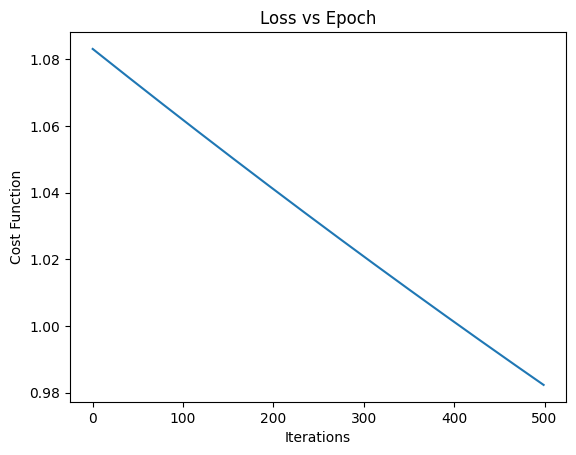

In [ ]:
plt.plot(range(500), lossFunction)
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Loss vs Epoch")
plt.show()

#### **Applying 1000 Iterations**

In [ ]:
theta=initial_theta_list[:]
lossFunction=[]
for i in range(1000):
  for j in range(len(miniBatch)-1):
    inputSet=standardizedData.iloc[miniBatch[j]:miniBatch[j+1],:].copy()
    outputSet=outputData.iloc[miniBatch[j]:miniBatch[j+1]].copy()
    inputSet=inputSet.reset_index(drop=True)
    outputSet=outputSet.reset_index(drop=True)
    theta=gradientDescent(inputSet, outputSet, 0.0001, theta)
  lossFunction.append(costFunction(standardizedData,outputData,theta))
print(initial_theta_list)
print(theta)

[0.4428248571655228, 0.8556939077011901, 0.48153465394868133, 0.6313846176455794, 0.5428111710738965, 0.9490744275997273, 0.9286941484443709, 0.7702067905346144, 0.17344147009006916, 0.5314623716536936]
[0.13025168 0.76423137 0.4943824  0.59084752 0.46294278 0.7335392
 0.8316562  0.69248404 0.06800011 0.46531306]


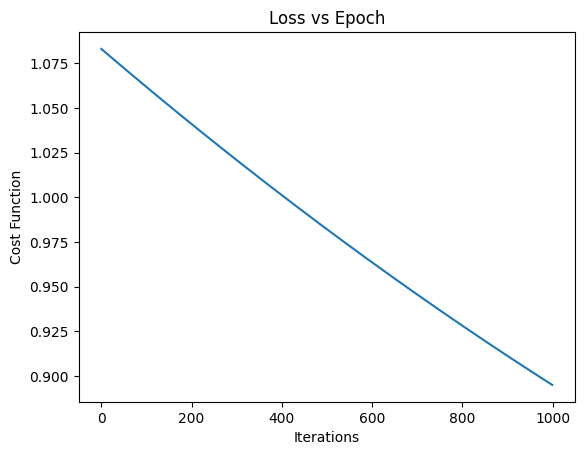

In [ ]:
plt.plot(range(1000), lossFunction)
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Loss vs Epoch")
plt.show()

#### **Applying 10000 Iterations**

In [ ]:
theta=initial_theta_list[:]
lossFunction=[]
for i in range(10000):
  for j in range(len(miniBatch)-1):
    inputSet=standardizedData.iloc[miniBatch[j]:miniBatch[j+1],:].copy()
    outputSet=outputData.iloc[miniBatch[j]:miniBatch[j+1]].copy()
    inputSet=inputSet.reset_index(drop=True)
    outputSet=outputSet.reset_index(drop=True)
    theta=gradientDescent(inputSet, outputSet, 0.0001, theta)
  lossFunction.append(costFunction(standardizedData,outputData,theta))
print(initial_theta_list)
print(theta)

[0.4428248571655228, 0.8556939077011901, 0.48153465394868133, 0.6313846176455794, 0.5428111710738965, 0.9490744275997273, 0.9286941484443709, 0.7702067905346144, 0.17344147009006916, 0.5314623716536936]
[-0.86197649  0.26135578  0.46556781  0.37337598  0.33367857 -0.03117953
  0.60414676  0.2789334  -0.28465205  0.06689036]


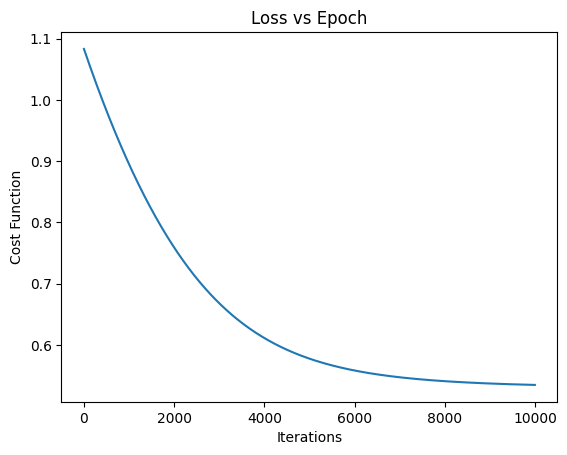

In [ ]:
plt.plot(range(10000), lossFunction)
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Loss vs Epoch")
plt.show()

Based on the learning curves above it is evident that an epoch value around 10000 is a good value to stop at as the curve seem to regularize and cost would not decrease significantly past this point.

# Sklearn Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
model=LogisticRegression()
model.fit(standardizedData, outputData)
coeffs = model.coef_.ravel()
print("Coeffecients: ",coeffs)


Coeffecients:  [ 0.00497817  0.22352541  0.50112611  0.35178153  0.55073835 -0.50168652
  0.50666469  0.32969915 -0.45420396 -0.03348626]


In [ ]:
print("Cost Function given coefficients: ",costFunction(standardizedData,outputData,coeffs))

Cost Function given coefficients:  0.5746070360924916


The final Errors at the higher learning rate for both batch and minibatch approaches yielded in a result close to that generated by the scikitlearn library ensuring accurate implementation of the model.